# Demand and Supply Analysis

## Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading and Exploring the dataset

In [5]:
df = pd.read_csv("rides.csv")

In [7]:
df.head()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
0,72,295,202.0
1,50,78,43.0
2,40,250,181.0
3,78,140,124.0
4,74,195,108.0


In [8]:
df.tail()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
1094,55,170,144.0
1095,99,141,117.0
1096,43,82,64.0
1097,35,127,90.0
1098,32,81,60.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Drivers Active Per Hour  1099 non-null   int64  
 1   Riders Active Per Hour   1099 non-null   int64  
 2   Rides Completed          1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 25.9 KB


**The dataset consists of 1099 records and 3 features. All the Features in the dataset are of Numeric DataType.**

In [10]:
df.describe()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
count,1099.000000,1099.000000,1045.000000
mean,55.212921,175.372157,107.470813
std,25.896744,72.304222,57.340921
min,10.000000,50.000000,2.000000
25%,34.000000,114.000000,66.000000
50%,55.000000,174.000000,96.000000
75%,78.000000,238.000000,142.000000
max,100.000000,300.000000,273.000000


## Checking and Dropping NULL values

In [11]:
df.isnull().sum()

Drivers Active Per Hour     0
Riders Active Per Hour      0
Rides Completed            54
dtype: int64

**Null values are present in Rides Completed.**

---



**Checking the weightage of null values w.r.t data:**

In [12]:
df.isnull().sum()/len(df)

Drivers Active Per Hour    0.000000
Riders Active Per Hour     0.000000
Rides Completed            0.049136
dtype: float64

**Since the Null values consists in less than 0.5% of the data, we can drop them since it will not make any impact on our analysis.**

---



**Getting information about the dataset after dropping null values**

In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1098
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Drivers Active Per Hour  1045 non-null   int64  
 1   Riders Active Per Hour   1045 non-null   int64  
 2   Rides Completed          1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 32.7 KB


## Data Analysis and Visualization

### Relationship between the number of drivers active per hour and the number of riders active per hour:

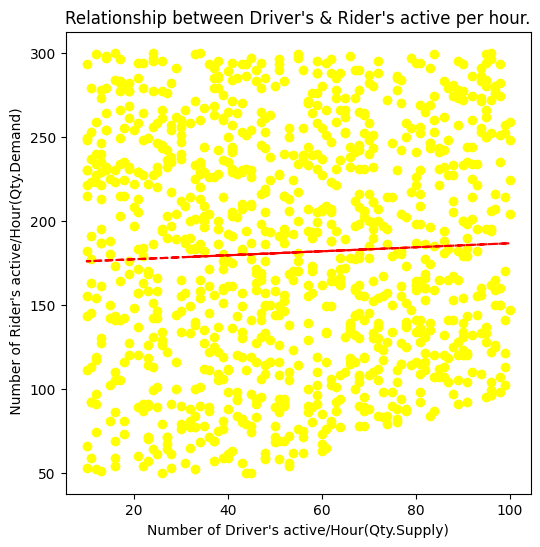

In [15]:
df.to_csv("data.csv",index = False)

# defining demand and supply
demand = df["Riders Active Per Hour"]
supply = df["Drivers Active Per Hour"]


plt.figure(figsize=(6,6))
plt.ylabel(" Number of Rider's active/Hour(Qty.Demand)")
plt.xlabel("Number of Driver's active/Hour(Qty.Supply)")
plt.title("Relationship between Driver's & Rider's active per hour")
plt.scatter(df["Drivers Active Per Hour"], df["Riders Active Per Hour"], c = "yellow")


# finding the equation for Trendline
z = np.polyfit(df["Drivers Active Per Hour"], df["Riders Active Per Hour"], 1)
p = np.poly1d(z)
plt.plot(df["Drivers Active Per Hour"], p(df["Drivers Active Per Hour"]), "r--")
plt.show()

### Calculating Elasticity of Demand

In [16]:
average_demand = df["Riders Active Per Hour"].mean()
average_supply = df["Drivers Active Per Hour"].mean()
print("average_demand: ",average_demand)
print("average_supply: ",average_supply)

average_demand:  181.0688995215311
average_supply:  53.70909090909091


In [17]:
delta_demand = (max(df["Riders Active Per Hour"]) - min(df["Riders Active Per Hour"])) / average_demand * 100
delta_supply = (max(df["Drivers Active Per Hour"]) - min(df["Drivers Active Per Hour"])) / average_supply * 100
print("delta_demand: ",delta_demand)
print("delta_supply: ",delta_supply)

delta_demand:  138.0689895728185
delta_supply:  167.56939742721733


In [23]:
elasticity = delta_demand/delta_supply
print("The Elasticity of Demand(Riders Active Per Hour) w.r.t Supply(Drivers Active Per Hour) is ",elasticity)

The Elasticity of Demand(Riders Active Per Hour) w.r.t Supply(Drivers Active Per Hour) is  0.8239511014103149


#### This signifies a moderate relationship between the demand for rides and the number of active drivers per hour. This means that if the number of drivers increase by 1% it leads to descrease the demand by 0.82%

#### The elasticity shows that the demand for rides is somewhat sensitive to changes in the number of active drivers per hour.

### Calculating Supply Ratio for each Driver's Activity

In [20]:
df["Supply_Ratio"] = df["Rides Completed"]/ df["Drivers Active Per Hour"]

In [24]:
df.head()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed,Supply_Ratio
0,72,295,202.0,2.805556
1,50,78,43.0,0.860000
2,40,250,181.0,4.525000
3,78,140,124.0,1.589744
4,74,195,108.0,1.459459


Creating a csv file with supply ratio for creating dashboard

In [21]:
df.to_csv("data2.csv",index = False)

### Visualizing Supply Ratio with respect to Driver's Activity

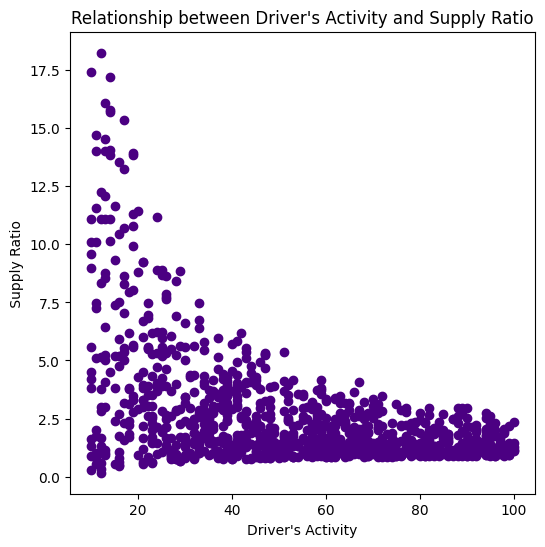

In [25]:
Drivers_ratio= df["Drivers Active Per Hour"]
supply_ratio= df["Supply_Ratio"]


plt.figure(figsize=(6,6))
plt.ylabel(" Supply Ratio ")
plt.xlabel("Driver's Activity")
plt.title("Relationship between Driver's Activity and Supply Ratio")
plt.scatter(Drivers_ratio, supply_ratio,c = "indigo")
plt.show()